# **Plot EDA**

**Just 2018 and 2021 year**

- 2018: Before Covid

- 2021: During/After Covid

- **stars_x: business dataset stars**

- **stars_y: review dataset stars**

## **1. Loading File**

In [ ]:
import pandas as pd

In [ ]:
# Read JSON file into a pandas DataFrame

file =  r'CIS509_finalfile.json'
df = pd.read_json(file, lines= True)

- This 'CIS509_finalfile.json' keeps changing the dtype format for column 'year_month' - column which was added to do timeseries analysis

- After loading the file, I just dropped the col and split year and month into 2 separate columns and had them raimain as an 'int' dtype and conducted my EDA based on that

In [ ]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,year_month
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",TaUkKNCcK_yVNst35g7fLw,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,"{'day': 31, 'day_of_week': 1, 'day_of_year': 2..."


In [ ]:
df.shape

(42422, 23)

In [ ]:
unique_review_count = df['review_count'].nunique()

# Print the result
print("Number of unique values in 'review_count' column:", unique_review_count)

Number of unique values in 'review_count' column: 404


In [ ]:
# Drop the 'year_month' column
df.drop(columns=['year_month'], inplace=True)

In [ ]:
df.shape

(42422, 22)

In [ ]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,"Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",TaUkKNCcK_yVNst35g7fLw,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create separate columns for year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,TaUkKNCcK_yVNst35g7fLw,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7


In [ ]:
df.dtypes

business_id             object
name                    object
address                 object
city                    object
state                   object
postal_code              int64
latitude               float64
longitude              float64
stars_x                float64
review_count             int64
is_open                  int64
attributes              object
categories              object
hours                   object
review_id               object
user_id                 object
stars_y                  int64
useful                   int64
funny                    int64
cool                     int64
text                    object
date            datetime64[ns]
year                     int64
month                    int64
dtype: object

In [ ]:
# Save to Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the JSON file to Google Drive
json_file_path_drive = '/content/drive/MyDrive/CIS509_workingfile.json'
df.to_json(json_file_path_drive, orient='records', lines=True)

# Print a message indicating the successful conversion
print(f"Dataset has been successfully converted and saved to {json_file_path_drive}")

Mounted at /content/drive
Dataset has been successfully converted and saved to /content/drive/MyDrive/CIS509_workingfile.json


## **2. EDA**

In [ ]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

        postal_code      latitude     longitude       stars_x  review_count  \
count  42422.000000  42422.000000  42422.000000  42422.000000  42422.000000   
mean   93100.538636     34.422365   -119.714126      4.055254    626.832068   
std       56.520823      0.084444      0.077294      0.507737    718.064997   
min    93013.000000     34.393343   -120.083748      1.500000      5.000000   
25%    93101.000000     34.413456   -119.736323      4.000000    170.000000   
50%    93101.000000     34.420334   -119.699243      4.000000    367.000000   
75%    93108.000000     34.427943   -119.690339      4.500000    828.000000   
max    96161.000000     39.382812   -119.511501      5.000000   3834.000000   

            is_open       stars_y        useful         funny          cool  \
count  42422.000000  42422.000000  42422.000000  42422.000000  42422.000000   
mean       0.905379      4.043256      0.991113      0.372943      0.654778   
std        0.292694      1.377188      4.111531    

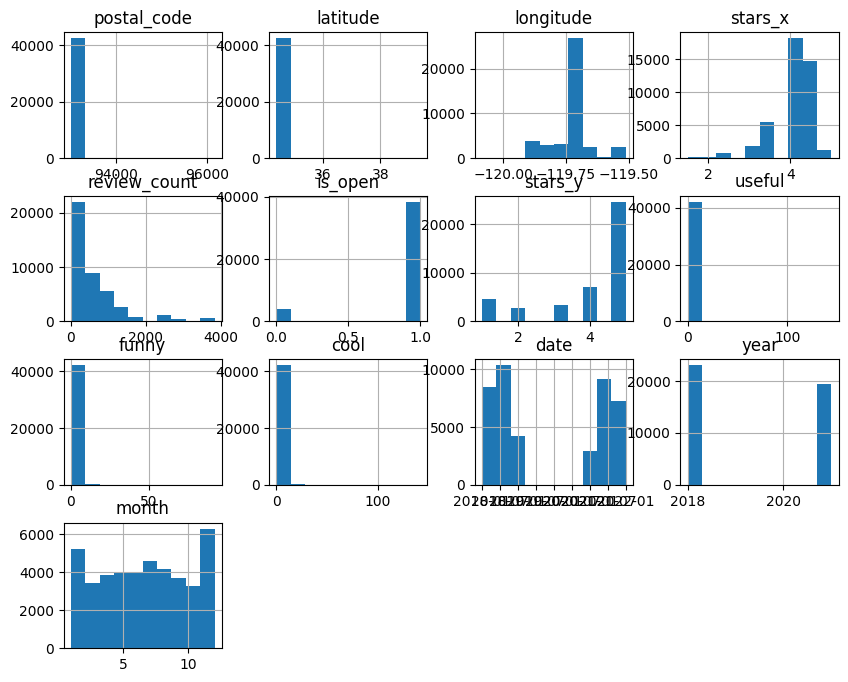

In [ ]:
import matplotlib.pyplot as plt

# Data Distribution - Histograms
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go

# Assuming df is your DataFrame and you want to include 'column1' and 'column2' in the box plot
columns_to_include = ['latitude', 'longitude', 'stars_x', 'stars_y', 'is_open', 'useful', 'funny', 'cool']

data = []

# Add box plots for each column
for column in columns_to_include:
    box = go.Box(y=df[column], name=column)
    data.append(box)

# Create the figure and specify the layout
fig = go.Figure(data=data)

# Update the layout of the figure
fig.update_layout(title='Box Plot',
                  xaxis_title='Columns',
                  yaxis_title='Values')

# Show the plot
fig.show()


<ipython-input-16-6272a096dce6>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



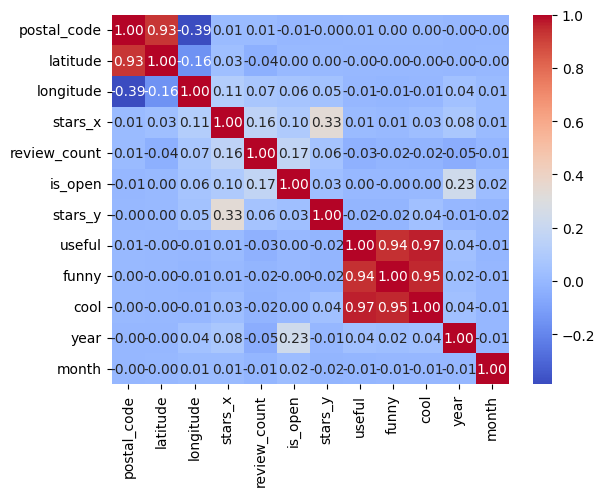

In [ ]:
import seaborn as sns

# Correlation Analysis - Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your DataFrame is named df
# Group by 'year' and 'month', and calculate the total reviews based on some other criteria
# Replace 'criteria_column' with the column name you want to use for calculating the total reviews
# For example, if you have a column named 'ratings' representing review ratings, you can sum it up
reviews_by_month_year = df.groupby(['year', 'month'])['review_id'].count().reset_index()

# Create a time series chart using Plotly
fig = go.Figure()

for year in reviews_by_month_year['year'].unique():
    year_data = reviews_by_month_year[reviews_by_month_year['year'] == year]
    fig.add_trace(go.Scatter(x=year_data['month'], y=year_data['review_id'],
                             mode='lines+markers', name=str(year)))

fig.update_layout(title='Total Reviews by Month and Year',
                  xaxis_title='Month',
                  yaxis_title='Total Reviews')

fig.show()


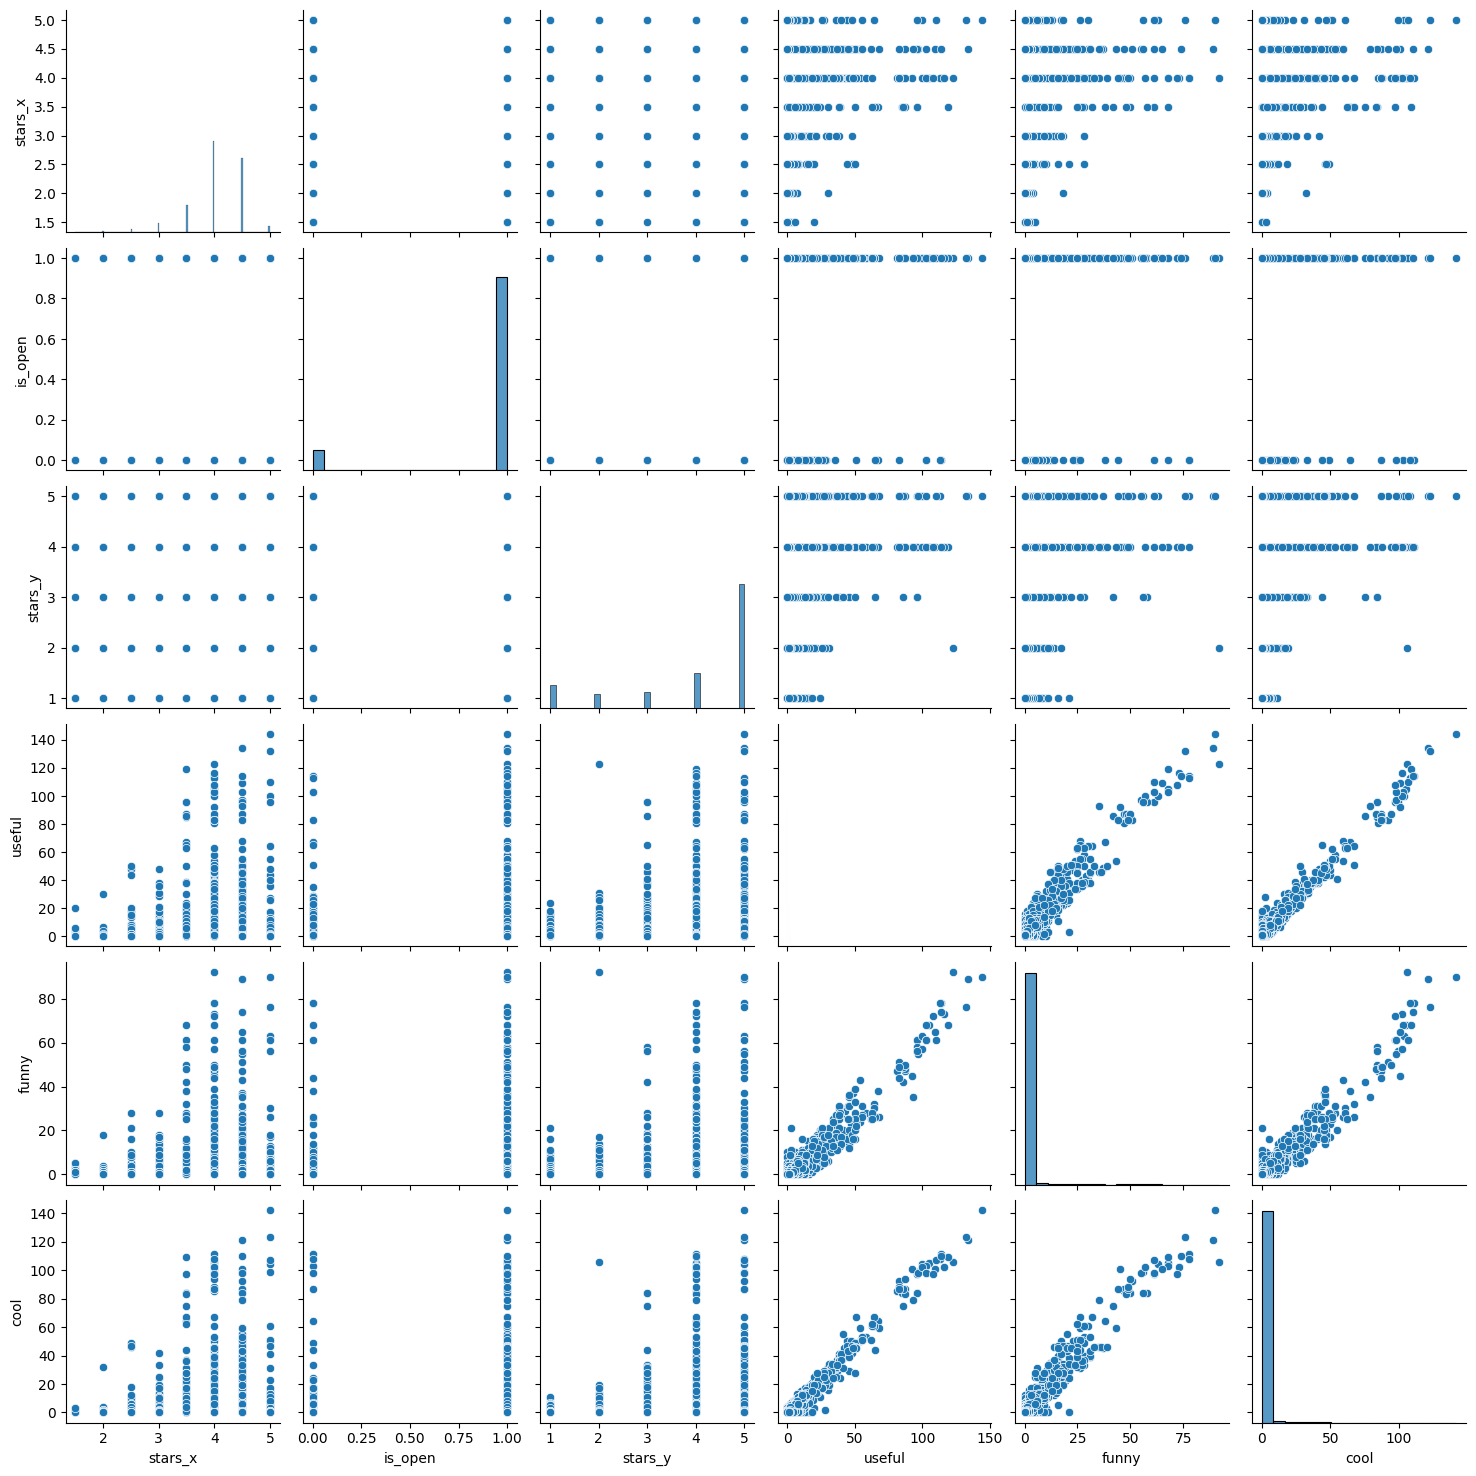

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame with numerical columns
# Replace 'numerical_column1', 'numerical_column2', etc. with your actual column names

# Create a DataFrame with numerical columns
numerical_columns = ['stars_x', 'is_open', 'stars_y', 'useful', 'funny', 'cool']
df_numerical = df[numerical_columns]

# Create a pair plot
sns.pairplot(df_numerical)
plt.show()